# Exploring Dandiset 001354: Hippocampal neuronal responses to programmable antigen-gated G-protein-coupled engineered receptor activation

**Version:** 0.250312.0036  
**Dandiset DOI:** [https://doi.org/10.48324/dandi.001354/0.250312.0036](https://doi.org/10.48324/dandi.001354/0.250312.0036)

---

⚠️ **Notebook was generated by AI and has not been independently verified. Exercise caution when interpreting code or results. It is recommended to review code and outputs before drawing any substantive conclusions.**

---

## Overview

This dataset contains single-cell electrophysiological recordings of mouse hippocampal CA1 neurons in response to the activation of programmable antigen-gated G-protein-coupled engineered receptors (PAGERs). Data were collected from neurons transfected with AAV1/2-hSyn-a-mCherry-PAGER-Gi-P2A-mEGFP, with responses to DCZ or DCZ + soluble mCherry application. The dataset is described further in [Klein, Peter (2025)](https://doi.org/10.48324/dandi.001354/0.250312.0036) and associated protocol ([see publication](https://doi.org/10.1038/s41586-024-08282-3)).

**Dandiset URL:** [https://dandiarchive.org/dandiset/001354/0.250312.0036](https://dandiarchive.org/dandiset/001354/0.250312.0036)

## What this notebook covers

- A brief overview of Dandiset 001354 and its structure.
- How to access the dataset using the DANDI API.
- How to load a selected NWB file using PyNWB, `h5py`, and `remfile`.
- Exploration of both stimulus and response data for a single cell.
- Example plots and summaries to illustrate how to work with the data.
- Links and suggestions for further analysis, including external exploration via Neurosift.

## Required packages

- **dandi**
- **pynwb**
- **h5py**
- **remfile**
- **matplotlib**
- **pandas**
- **seaborn**
- **numpy**

_All of these packages should already be installed._

---

## 1. Connect to the DANDI Archive and Explore Dandiset Metadata

In [1]:
from itertools import islice
from dandi.dandiapi import DandiAPIClient

# Connect to the DANDI archive and retrieve Dandiset
client = DandiAPIClient()
dandiset = client.get_dandiset("001354", "0.250312.0036")

# Print basic metadata
metadata = dandiset.get_raw_metadata()
print(f"Dandiset name: {metadata['name']}")
print(f"Dandiset identifier: {metadata['identifier']}")
print(f"Version: {metadata['version']}")
print(f"Description: {metadata['description'][:250]}...")  # Show only a snippet for brevity
print(f"Keywords: {metadata.get('keywords', [])}")
print(f"Measurement techniques: {[x['name'] for x in metadata.get('measurementTechnique', [])]}")

Dandiset name: Hippocampal neuronal responses to programmable antigen-gated G-protein-coupled engineered receptor activation
Dandiset identifier: DANDI:001354
Version: 0.250312.0036
Description: This dataset contains single cell electrophysiological recordings of mouse hippocampal CA1 neurons in response to activation of programmable antigen-gated G-protein-coupled engineered receptors. Recorded neurons were transfected with an AAV1/2-hSyn-a...
Keywords: ['CA1', 'PAGER', 'Chemogenetics', 'Antigen-gated']
Measurement techniques: []


### List a few assets in this Dandiset
The dataset consists of many NWB files (recordings from individual cells/slices). Here are the first five:

In [2]:
# List some assets in the Dandiset
assets = dandiset.get_assets()
for i, asset in zip(range(5), assets):
    print(f"- {asset.path} (ID: {asset.identifier}, Size: {asset.size/1e6:.1f} MB)")

- sub-PK-109/sub-PK-109_ses-20240717T180719_slice-2024-07-17-0009_cell-2024-07-17-0009_icephys.nwb (ID: b2860f39-ba08-4b5f-8e12-c4b51ad6ccba, Size: 40.3 MB)
- sub-PK-109/sub-PK-109_ses-20240717T150830_slice-2024-07-17-0001_cell-2024-07-17-0001_icephys.nwb (ID: 8609ffee-a79e-498c-8dfa-da46cffef135, Size: 41.2 MB)
- sub-PK-109/sub-PK-109_ses-20240717T184616_slice-2024-07-17-0011_cell-2024-07-17-0011_icephys.nwb (ID: c1a42ce7-eca1-481c-9bed-1fc055ba1aef, Size: 38.4 MB)
- sub-PK-109/sub-PK-109_ses-20240717T164239_slice-2024-07-17-0005_cell-2024-07-17-0005_icephys.nwb (ID: a93f7c5b-a804-4165-aec5-c3571f0611f2, Size: 44.2 MB)
- sub-PK-109/sub-PK-109_ses-20240717T155714_slice-2024-07-17-0003_cell-2024-07-17-0003_icephys.nwb (ID: 58c534de-2a38-4a5b-986c-2dc4c3067b97, Size: 39.8 MB)


## 2. Select and Inspect an Example NWB File

For demonstration, we will use the following file:

**sub-PK-109/sub-PK-109_ses-20240717T150830_slice-2024-07-17-0001_cell-2024-07-17-0001_icephys.nwb**

The URL for this asset is:

```
https://api.dandiarchive.org/api/assets/8609ffee-a79e-498c-8dfa-da46cffef135/download/
```

You can also explore this file interactively on Neurosift:  
[Open in Neurosift](https://neurosift.app/nwb?url=https://api.dandiarchive.org/api/assets/8609ffee-a79e-498c-8dfa-da46cffef135/download/&dandisetId=001354&dandisetVersion=draft)

We'll show how to load the file using PyNWB, `h5py`, and `remfile`.

### Load the NWB file (streamed, not downloaded)
_This may take some time as the file is streamed over the internet._

In [3]:
import pynwb
import h5py
import remfile

nwb_url = "https://api.dandiarchive.org/api/assets/8609ffee-a79e-498c-8dfa-da46cffef135/download/"
remote_file = remfile.File(nwb_url)
h5_file = h5py.File(remote_file, "r")
io = pynwb.NWBHDF5IO(file=h5_file, load_namespaces=True)
nwb = io.read()

print("NWB session description:", nwb.session_description)
print("NWB identifier:", nwb.identifier)
print("Session start time:", nwb.session_start_time)

/home/magland/miniconda3/envs/dev/lib/python3.12/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'core' version 2.8.0 because version 2.7.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."


NWB session description: Intracellular electrophysiology experiment.
NWB identifier: pk2024_07_17_0001
Session start time: 2024-07-17 15:08:30-07:00


## 3. NWB File Contents Overview
We summarize the contents using Python, aiming to provide a snapshot of the key structural elements and brief metadata.

In [4]:
# Devices
devices = list(nwb.devices.keys())
# Electrodes
electrodes = list(nwb.icephys_electrodes.keys())
# Number of acquisitions (CurrentClampSeries)
acquisitions = list(nwb.acquisition.keys())
# Number of stimuli
stimuli = list(nwb.stimulus.keys())

print("Devices:", devices)
print("Electrodes:", electrodes)
print(f"Number of acquisitions (CurrentClampSeries): {len(acquisitions)}")
print(f"Number of stimuli: {len(stimuli)}")

Devices: ['DeviceIcephys']
Electrodes: ['electrode-0', 'electrode-1']
Number of acquisitions (CurrentClampSeries): 624
Number of stimuli: 624


### NWB File Structure (partial, as tree)

```
NWB File
├─ devices: { 'DeviceIcephys' }
├─ icephys_electrodes: { 'electrode-0', 'electrode-1' }
├─ acquisition (responses): e.g. current_clamp-response-01-ch-0, ...
├─ stimulus (inputs): e.g. stimulus-01-ch-0, ...
├─ subject: { id: PK-109, species: Mus musculus, sex: F, age_ref: birth, date_of_birth: 2024-04-07 }
├─ lab_meta_data: DandiIcephysMetadata
    ├─ cell_id: 2024_07_17_0001
    └─ slice_id: 2024_07_17_0001
├─ intracellular_recordings, icephys_simultaneous_recordings, icephys_sequential_recordings (tables)
└─ ...
```

(Explore subtrees with `list(nwb.<attribute>.keys())` or using `dir()`.)

## 4. Examine Stimulus and Response Data for a Single Sweep
For illustration, let's access and plot the stimulus and response time series for "current_clamp-response-01-ch-0" and "stimulus-01-ch-0".

**Note:** We'll only load a short segment for plotting, since these arrays can be very large.

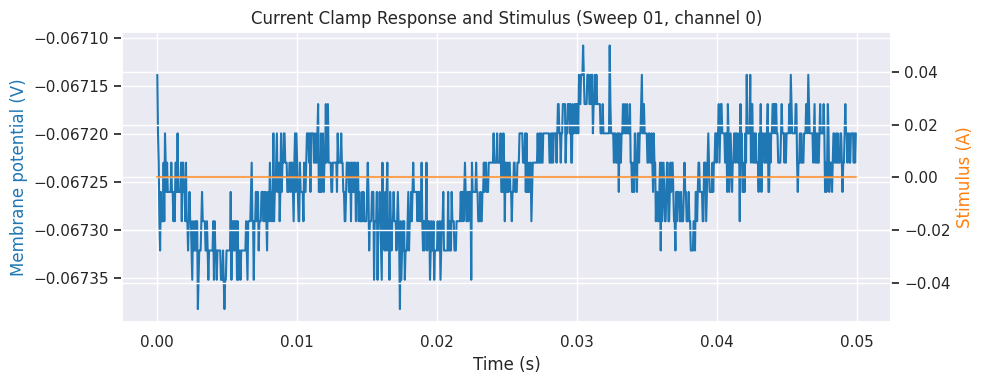

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set_theme()

# Access objects and datasets
response = nwb.acquisition["current_clamp-response-01-ch-0"]
stimulus = nwb.stimulus["stimulus-01-ch-0"]

# Both are ~100,000 samples, let's plot the first 1000 samples
n_samples = 1000
sampling_rate = response.rate  # 20000.0 Hz
t = np.arange(n_samples) / sampling_rate
signal = response.data[:n_samples] * response.conversion  # To volts
stim = stimulus.data[:n_samples] * stimulus.conversion    # To amperes

fig, ax1 = plt.subplots(figsize=(10, 4))
color1 = 'tab:blue'
ax1.plot(t, signal, color=color1, label="Membrane potential (V)")
ax1.set_ylabel("Membrane potential (V)", color=color1)
ax1.set_xlabel("Time (s)")

ax2 = ax1.twinx()
color2 = 'tab:orange'
ax2.plot(t, stim, color=color2, label="Stimulus current (A)", alpha=0.7)
ax2.set_ylabel("Stimulus (A)", color=color2)

plt.title("Current Clamp Response and Stimulus (Sweep 01, channel 0)")
plt.tight_layout()
plt.show()

## 5. Inspecting Tabular Data
The file includes some NWB tables (e.g., intracellular_recordings), but for this file the columns are empty or very sparse.

Example (will display empty columns):

In [6]:
df_sequential = nwb.icephys_sequential_recordings.to_dataframe()
print(df_sequential.head())

                              simultaneous_recordings stimulus_type
id                                                                 
0                                               re...          ramp


## 6. Exploring Other Sweeps or Channels

Let's take a look at another sweep (e.g., sweep 2) and plot both channels.

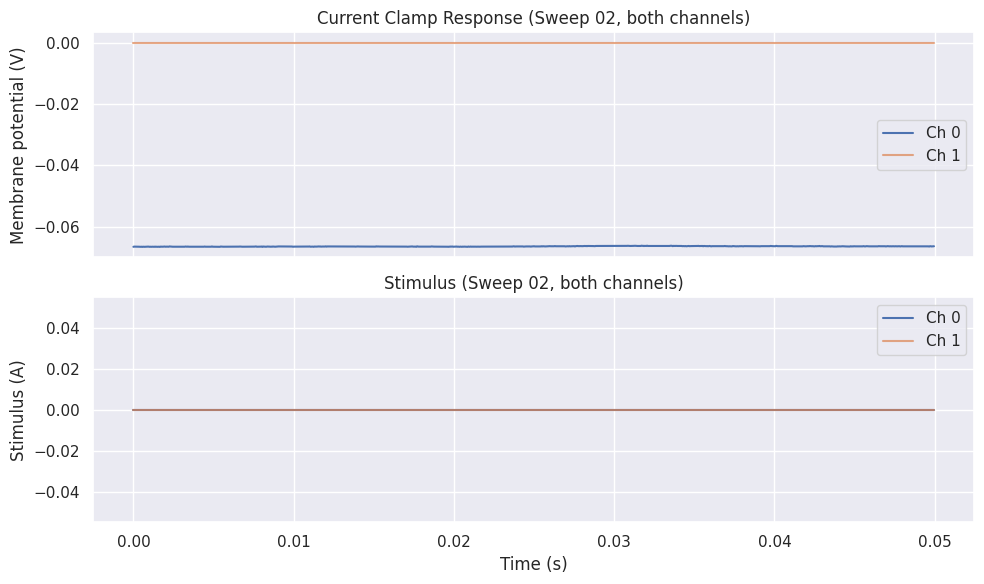

In [7]:
# Load sweep 2, both channels
resp_2_ch0 = nwb.acquisition["current_clamp-response-02-ch-0"]
resp_2_ch1 = nwb.acquisition["current_clamp-response-02-ch-1"]
stim_2_ch0 = nwb.stimulus["stimulus-02-ch-0"]
stim_2_ch1 = nwb.stimulus["stimulus-02-ch-1"]

n_samples = 1000
t = np.arange(n_samples) / resp_2_ch0.rate

fig, axs = plt.subplots(2, 1, figsize=(10, 6), sharex=True)

axs[0].plot(t, resp_2_ch0.data[:n_samples] * resp_2_ch0.conversion, label="Ch 0")
axs[0].plot(t, resp_2_ch1.data[:n_samples] * resp_2_ch1.conversion, label="Ch 1", alpha=0.7)
axs[0].set_ylabel("Membrane potential (V)")
axs[0].set_title("Current Clamp Response (Sweep 02, both channels)")
axs[0].legend()

axs[1].plot(t, stim_2_ch0.data[:n_samples] * stim_2_ch0.conversion, label="Ch 0")
axs[1].plot(t, stim_2_ch1.data[:n_samples] * stim_2_ch1.conversion, label="Ch 1", alpha=0.7)
axs[1].set_ylabel("Stimulus (A)")
axs[1].set_xlabel("Time (s)")
axs[1].set_title("Stimulus (Sweep 02, both channels)")
axs[1].legend()

plt.tight_layout()
plt.show()

## 7. Summary and Future Directions

In this notebook, we demonstrated:
- How to connect to and query the DANDI Archive.
- How to load and stream data from a NWB file using PyNWB and remfile, without downloading the whole file.
- How to access and visualize stimulus and response data for a hippocampal neuron experiment.

**Possible next steps:**
- Batch-processing or summarizing data across multiple cells (iterating over more NWB files).
- Quantitative analyses (e.g., extracting spikes, calculating input resistance, etc.).
- Examining stimulus/response properties across sweeps and conditions.
- Integrating with interactive tools like [Neurosift](https://neurosift.app/) for 3D or multi-modal visualization.

_Note:_ This notebook gives basic code patterns; analysis and interpretation should be validated by an expert.